In [17]:
! pip install pandas matplotlib joblib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
stopwords = ['myself', 'ours', 'ourselves', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
             'yourselves', 'himself', "she's", 'hers', 'herself', "it's", 'itself', 'they', 'them', 'their', 'theirs', 
             'themselves', 'what', 'which', 'whom', 'this', 'that', "that'll", 'these', 'those', 'were', 'been', 'being', 
             'have', 'having', 'does', 'doing', 'because', 'until', 'while', 'with', 'about', 'against', 'between', 'into', 
             'through', 'during', 'before', 'after', 'above', 'below', 'from', 'down', 'over', 'under', 'again', 'further', 
             'then', 'once', 'here', 'there', 'when', 'where', 'both', 'each', 'more', 'most', 'other', 'some', 'such', 
             'only', 'same', 'than', 'very', 'will', 'just', "don't", 'should', "should've", 'aren', "aren't", 'couldn', 
             "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
             "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', 
             "shouldn't", 'wasn', "wasn't", 'weren', "weren't", "won't", 'wouldn', "wouldn't", 'know', 'little', 
             'time', 'still', 'imagine', 'deep', 'says', 'means', 'gets', 'trust', 'meet', 'would', 'people', 'want', 
             'think', 'however', 'much', 'list', 'bring', 'stand', 'waiting']



In [47]:
df = pd.read_csv('text.csv')

for col in df.columns:
    df.rename(columns={col: col.strip()}, inplace=True)

df = df.dropna()
df.drop(df.columns[0], axis=1, inplace=True)

df_label_0 = df[df['label'] == 0]
df_label_1 = df[df['label'] == 1]

df_label_0_half = df_label_0.sample(frac=0.5, random_state=42)
df_label_1_half = df_label_1.sample(frac=0.5, random_state=42)

df_reduced = pd.concat([df[df['label'] > 1], df_label_0_half, df_label_1_half])

df = df_reduced.sample(frac=1, random_state=42).reset_index(drop=True)

X = df['text']
Y = df['label']

vectorizer = TfidfVectorizer(max_features=619)

vectorizer.fit(X)
dump(vectorizer, 'vectonizer')

X_vectorized = vectorizer.transform(X)

vocab = vectorizer.get_feature_names_out()

filtered_vocab = [word for word in vocab if len(word) > 3]

word_freq = X_vectorized.sum(axis=0)

word_freq_df = pd.DataFrame(word_freq, columns=vocab)

top_words = word_freq_df.sum().sort_values(ascending=False)
    
while df.shape[1] < 100:
    for word in top_words.index:
        if word in filtered_vocab and word not in stopwords:
            df[word] = X.str.contains(word).astype(int)
    
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['text', 'label'], axis=1), Y, test_size=0.2, random_state=42)



C:\Users\disrct\AppData\Local\Temp\ipykernel_19448\4021712641.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[word] = X.str.contains(word).astype(int)
C:\Users\disrct\AppData\Local\Temp\ipykernel_19448\4021712641.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[word] = X.str.contains(word).astype(int)
C:\Users\disrct\AppData\Local\Temp\ipykernel_19448\4021712641.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [44]:
# print(df)
print(df.columns)

Index(['text', 'label', 'feel', 'feeling', 'like', 'really', 'even',
       'something', 'life', 'dont',
       ...
       'gave', 'early', 'worth', 'personal', 'order', 'shit', 'deal', 'wait',
       'perhaps', 'chance'],
      dtype='object', length=621)


Text(0, 0.5, 'Quantidade')

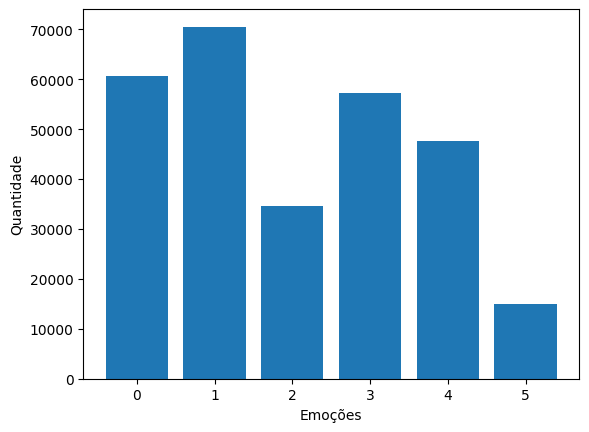

In [45]:
labels, counts = np.unique(df['label'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.xlabel('Emoções')
plt.ylabel('Quantidade')

[]

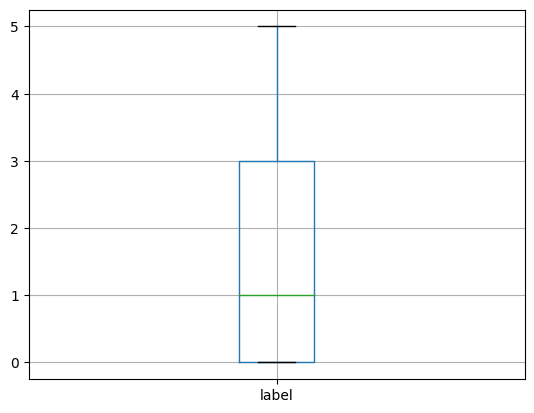

In [7]:
stud_bplt = df.boxplot(column = ['label'])
stud_bplt.plot()

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, Y_train)

accuracy = gbm_model.score(X_test, Y_test)
print("Acurácia do modelo Gradient Boosting Classifier:", accuracy)

dump(gbm_model, "GradientBoostingClassifier.pkl")

Acurácia do modelo Gradient Boosting Classifier: 0.7745768941316485


['GradientBoostingClassifier.pkl']

In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

accuracy = rf_model.score(X_test, Y_test)
print("Acurácia do modelo RandomForestClassifier:", accuracy )

Acurácia do modelo RandomForestClassifier: 0.803603560375231


In [12]:
from sklearn.svm import SVC

model = SVC(kernel='poly')
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print('X_train: ' + accuracy_score(Y_train, model.predict(X_train)))
print('X_test: ' + accuracy_score(Y_test, model.predict(X_test)))

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html